In [17]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

In [54]:
proteins_csv_info = "/Volumes/NO NAME/Ollie/ST3_UKB_proteins.csv"

df_p_data = pd.read_csv(proteins_csv_info)

df_p_data

,UKBPPP ProteinID,Olink ID,Assay Target,Protein panel,Gene symbol,UniProt,Gene CHROM,Gene start,Gene end,Dilution factor,% of samples below LOD,Coefficient of variation (median %)
0,AARSD1:Q9BTE6:OID21311:v1,OID21311,AARSD1,Oncology,AARSD1,Q9BTE6,17,42950526,42964498,1:1,0.05%,4.78
1,ABHD14B:Q96IU4:OID20921:v1,OID20921,ABHD14B,Neurology,ABHD14B,Q96IU4,3,51968510,51983409,1:1,0.04%,8.97
2,ABL1:P00519:OID21280:v1,OID21280,ABL1,Oncology,ABL1,P00519,9,130713016,130887675,1:1,0.04%,6.03
3,ACAA1:P09110:OID21269:v1,OID21269,ACAA1,Oncology,ACAA1,P09110,3,38103129,38137242,1:1,17.20%,12.97
4,ACAN:P16112:OID20159:v1,OID20159,ACAN,Cardiometabolic,ACAN,P16112,15,88803436,88875353,1:10,0.13%,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,XRCC4:Q13426:OID20869:v1,OID20869,XRCC4,Neurology,XRCC4,Q13426,5,83077498,83353787,1:1,80.94%,7.55
1468,YES1:P07947:OID21348:v1,OID21348,YES1,Oncology,YES1,P07947,18,721588,812546,1:1,0.04%,10.59
1469,YTHDF3:Q7Z739:OID20478:v1,OID20478,YTHDF3,Inflammation,YTHDF3,Q7Z739,8,63168553,63212786,1:1,10.88%,13.11
1470,ZBTB16:Q05516:OID21205:v1,OID21205,ZBTB16,Oncology,ZBTB16,Q05516,11,114059041,114256765,1:1,0.51%,8.49


In [10]:
csv_file = "/Volumes/NO NAME/Ollie/merged_data.csv"

df = pd.read_csv(csv_file)

df

,Unnamed: 0,eid,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,...,lML_FA,rML_FA,lPTR_FA,rPTR_FA,lSLF_FA,rSLF_FA,lSTR_FA,rSTR_FA,lUnc_FA,rUnc_FA
0,1,1000573,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,...,0.425137,0.438404,0.477601,0.466786,0.486486,0.435698,0.434628,0.437619,0.414991,0.403708
1,2,1000893,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,...,0.407959,0.397717,0.445529,0.457740,0.453780,0.433911,0.409192,0.423134,0.378078,0.373331
2,3,1001028,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,...,0.410745,0.450009,0.477916,0.441603,0.451860,0.430216,0.422117,0.421530,0.376068,0.365023
3,4,1003537,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,...,0.430355,0.439236,0.491488,0.471265,0.450530,0.446036,0.429410,0.430935,0.412622,0.406120
4,5,1004616,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,...,0.410290,0.408738,0.474783,0.450130,0.447044,0.431624,0.451923,0.441271,0.368224,0.360642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,6018609,0.00650,0.45365,0.4506,1.42485,1.10560,0.6354,0.66945,0.28730,...,0.463914,0.468890,0.445366,0.452633,0.430563,0.407339,0.427389,0.405904,0.363829,0.351309
4640,4641,6019358,0.49865,0.02620,0.5769,0.61225,0.49330,0.5430,0.55165,1.00795,...,0.420189,0.414230,0.451537,0.454354,0.427003,0.419351,0.419468,0.429952,0.370552,0.380164
4641,4642,6021143,0.10620,2.29245,0.1899,0.03165,0.36700,1.0386,0.13275,1.36590,...,0.413580,0.398320,0.468904,0.474296,0.457283,0.457668,0.439893,0.454022,0.429197,0.464371
4642,4643,6021217,0.02515,0.15630,0.4839,0.79975,4.44390,0.0259,0.15815,0.19085,...,0.432379,0.425174,0.444384,0.479776,0.454680,0.449540,0.431674,0.433359,0.397299,0.383125


In [46]:
df.drop(columns=['eid'], inplace=True)

In [47]:
wm_cols = ["FMaj_FA", "FMin_FA", "lAR_FA", "lATR_FA", "lCingG_FA", "lCingPH_FA",
           "lCST_FA", "lIFOF_FA", "lILF_FA", "lML_FA", "lPTR_FA", "lSLF_FA",
           "lSTR_FA", "lUnc_FA", "MCP_FA", "rAR_FA", "rATR_FA", "rCingG_FA",
           "rCingPH_FA", "rCST_FA", "rIFOF_FA", "rILF_FA", "rML_FA", "rPTR_FA",
           "rSLF_FA", "rSTR_FA", "rUnc_FA"]

wm = df[wm_cols]

proteins = df[[col for col in df.columns if col not in wm_cols]]

In [56]:
proteins

,Unnamed: 0,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,...,PRDX1,NAAA,NGF,MITD1,MMP1,OBP2B,PCOLCE,PAEP,NPM1,NMNAT1
0,1,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,...,0.34580,1.0442,0.0900,0.67620,0.74310,0.49010,0.039624,1.86860,0.011198,0.0622
1,2,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,...,1.22255,1.0864,0.0038,1.36675,0.44735,0.70345,0.039624,3.49205,0.515900,1.2389
2,3,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,...,1.47190,0.3559,0.0624,1.56560,1.45220,1.18670,0.039624,0.00000,0.011198,0.1559
3,4,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,...,0.02150,0.3292,0.0640,0.41860,1.32090,1.41025,0.039624,1.36310,0.011198,0.9298
4,5,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,...,0.30125,0.4677,0.0376,0.72735,0.58605,0.85185,0.039624,0.16445,0.011198,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,0.00650,0.45365,0.4506,1.42485,1.10560,0.6354,0.66945,0.28730,0.39795,...,0.52620,0.4138,0.3772,0.36270,0.36140,1.02420,0.306250,0.92680,0.011198,0.7953
4640,4641,0.49865,0.02620,0.5769,0.61225,0.49330,0.5430,0.55165,1.00795,0.50570,...,1.00565,0.5498,0.2122,0.59325,0.62125,0.05985,0.009800,1.64825,0.251700,0.1440
4641,4642,0.10620,2.29245,0.1899,0.03165,0.36700,1.0386,0.13275,1.36590,0.57045,...,0.52640,0.3326,0.0231,0.12760,1.95350,0.02335,0.039624,0.44200,0.011198,0.5101
4642,4643,0.02515,0.15630,0.4839,0.79975,4.44390,0.0259,0.15815,0.19085,0.15670,...,0.16195,0.1605,0.1358,0.75825,0.61365,0.03335,0.039624,1.31365,0.011198,0.1079


In [111]:
lookup = {}

colors = {"Inflammation": "tab:red", "Neurology": "tab:blue", "Cardiometabolic": "tab:orange", "Oncology": "tab:green"}

for index in range(0,len(proteins.columns)):
    name = proteins.columns[index]
    panel = df_p_data[df_p_data['Assay Target'] == name]['Protein panel'].to_list()
    if index == 0:
        panel = ""
        color = "tab:grey"
    else:
        panel = panel[0]
        color = colors[panel]
    lookup[index] = {"name": name, "panel": panel, "color": color}

lookup

{0: {'name': 'Unnamed: 0', 'panel': '', 'color': 'tab:grey'},
 1: {'name': 'GZMB', 'panel': 'Inflammation', 'color': 'tab:red'},
 2: {'name': 'GRPEL1', 'panel': 'Oncology', 'color': 'tab:green'},
 3: {'name': 'GSAP', 'panel': 'Oncology', 'color': 'tab:green'},
 4: {'name': 'GSTA1', 'panel': 'Cardiometabolic', 'color': 'tab:orange'},
 5: {'name': 'GSTA3', 'panel': 'Oncology', 'color': 'tab:green'},
 6: {'name': 'GSTP1', 'panel': 'Neurology', 'color': 'tab:blue'},
 7: {'name': 'GUCA2A', 'panel': 'Neurology', 'color': 'tab:blue'},
 8: {'name': 'GUSB', 'panel': 'Cardiometabolic', 'color': 'tab:orange'},
 9: {'name': 'GYS1', 'panel': 'Cardiometabolic', 'color': 'tab:orange'},
 10: {'name': 'GZMA', 'panel': 'Inflammation', 'color': 'tab:red'},
 11: {'name': 'HDGF', 'panel': 'Oncology', 'color': 'tab:green'},
 12: {'name': 'GZMH', 'panel': 'Cardiometabolic', 'color': 'tab:orange'},
 13: {'name': 'HAGH', 'panel': 'Oncology', 'color': 'tab:green'},
 14: {'name': 'HAO1', 'panel': 'Oncology', 'co

In [112]:
lookup[1]

{'name': 'GZMB', 'panel': 'Inflammation', 'color': 'tab:red'}

In [86]:
df2 = df_p_data[['Assay Target', 'Protein panel']]

df2[df2['Assay Target'] == 'THBS4']

,Assay Target,Protein panel
1352,THBS4,Cardiometabolic


In [49]:
pls2 = PLSRegression(n_components=2)

pls2.fit(proteins, wm)

PLSRegression()

In [118]:
[lookup[i]['color'] for i in range(0,len(pls2.x_loadings_))]

['tab:grey',
 'tab:red',
 'tab:green',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:red',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:blue',
 'tab:green',
 'tab:blue',
 'tab:green',
 'tab:green',
 'tab:red',
 'tab:blue',
 'tab:red',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:red',
 'tab:red',
 'tab:green',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:red',
 'tab:orange',
 'tab:red',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:red',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:red',
 'tab:blue',
 'tab:red',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:red',
 'tab:red',
 'tab:green',
 'tab:orange',
 'tab:red',
 'tab:red',
 'tab:green',
 'tab:orange',

<BarContainer object of 1464 artists>

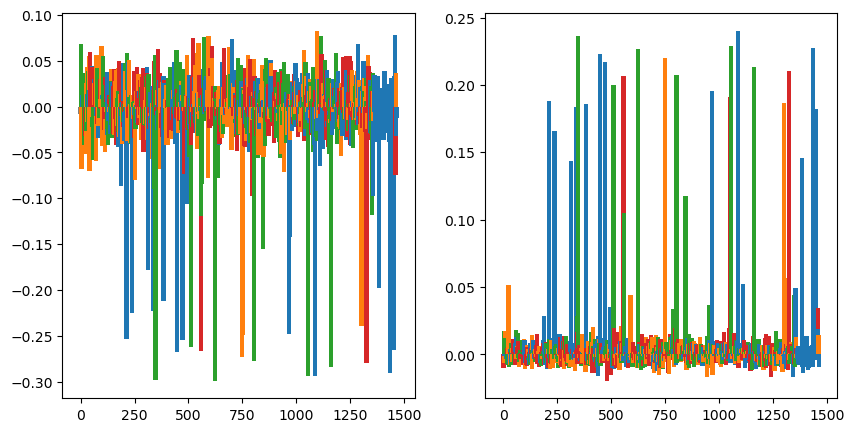

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

bar_colors =[lookup[i]['color'] for i in range(0,len(pls2.x_loadings_))]

ax1.bar(range(0, len(pls2.x_loadings_)), pls2.x_loadings_[:,0], width=20, color=bar_colors)
ax2.bar(range(0, len(pls2.x_loadings_)), pls2.x_loadings_[:,1], width=20, color=bar_colors)

In [125]:
x_variance = np.var(pls2.x_scores_, axis=0)

print(x_variance[0],x_variance[1])

1.7345185756496198 11.165276704065656


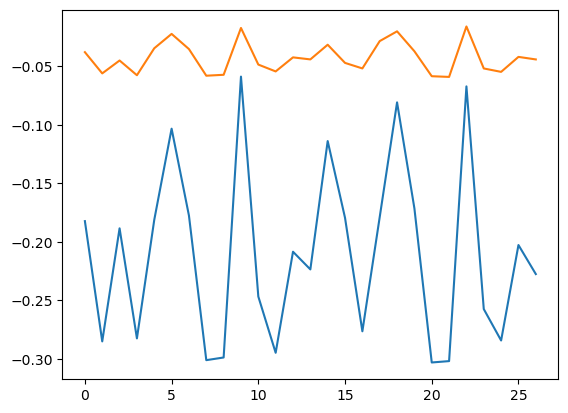

In [52]:
plt.plot(pls2.y_loadings_)

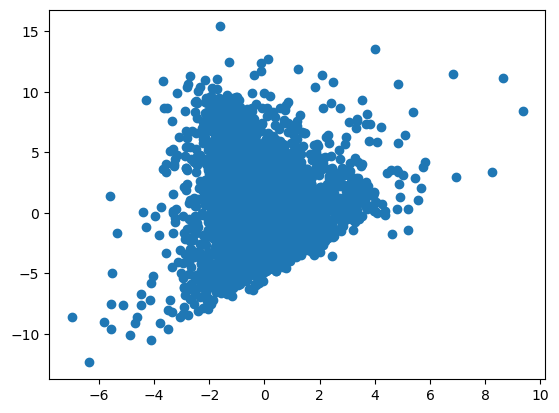

In [53]:
plt.scatter(pls2.x_scores_[:, 0], pls2.x_scores_[:, 1])